In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib.pyplot import imshow
from tensorflow import keras
from PIL import Image
import os
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/glaucoma.csv') 
data["path"] = "/content/drive/MyDrive/datamed/" + data.Filename
data["target"] = data["Glaucoma"]
data.target.value_counts()

0    482
1    168
Name: target, dtype: int64

In [ ]:
train = data[:520][:]
val = data[520:580]
test = data[520:][:]
print(test.target.value_counts())
print(train.target.value_counts())
print(val.target.value_counts())


0    71
1    59
Name: target, dtype: int64
0    411
1    109
Name: target, dtype: int64
0    44
1    16
Name: target, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90,horizontal_flip=True)
test_generator = test_datagen.flow_from_dataframe(
    test,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
    class_mode='raw')

Found 130 validated image filenames.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90,horizontal_flip=True)
train_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
    class_mode='raw')

Found 520 validated image filenames.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90,horizontal_flip=True)
val_generator = val_datagen.flow_from_dataframe(
    val,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    shuffle=True,
    class_mode='raw')

Found 60 validated image filenames.


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)       

In [ ]:
a = 5
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,
                    batch_size=1,
                    epochs=a,steps_per_epoch=5,validation_data=val_generator)

Epoch 1/5
5/5 [==============================] - 9s 2s/step - loss: 1.2272 - accuracy: 0.7250 - val_loss: 0.6222 - val_accuracy: 0.7333
Epoch 2/5
5/5 [==============================] - 7s 2s/step - loss: 1.8617 - accuracy: 0.5500 - val_loss: 0.5820 - val_accuracy: 0.7333
Epoch 3/5
5/5 [==============================] - 7s 2s/step - loss: 1.3922 - accuracy: 0.7500 - val_loss: 0.6118 - val_accuracy: 0.7333
Epoch 4/5
5/5 [==============================] - 7s 2s/step - loss: 1.2684 - accuracy: 0.6750 - val_loss: 0.6355 - val_accuracy: 0.7333
Epoch 5/5
5/5 [==============================] - 7s 2s/step - loss: 0.8617 - accuracy: 0.7750 - val_loss: 0.6721 - val_accuracy: 0.7333


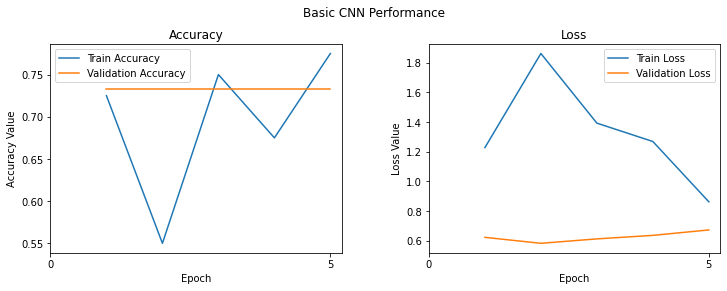

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,a+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, a+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, a+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
results = model.evaluate(test_generator, batch_size=128)
print("test loss, test acc:", results)

17/17 [==============================] - 15s 921ms/step - loss: 0.6868 - accuracy: 0.5462
test loss, test acc: [0.6868141293525696, 0.5461538434028625]


In [ ]:
model.save("model")